<a href="https://colab.research.google.com/github/josdank/Analisis-de-Datos_2024B/blob/main/Deber_Libro_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Deber1_AD24B_Libro_NLTK_JosuéGuerra

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import files
import plotly as plt
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as pt
from wordcloud import WordCloud as wc
import re
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

with open(filename, 'r') as f:
  file_contents = f.read()
  print("File contents:")

Saving Pride and Prejudice by Jane Austen.txt to Pride and Prejudice by Jane Austen.txt
User uploaded file "Pride and Prejudice by Jane Austen.txt" with length 752575 bytes
File contents:


In [4]:
book = file_contents

sentences = nltk.sent_tokenize(book)
for sentence in sentences:
  print(sentence)

Se han truncado las últimas 5000 líneas del flujo de salida.
somewhat of a trial to the latter method, in her partiality for Wickham,
and that its ill success might, perhaps, authorize her to seek the other
less interesting mode of attachment.
Be that as it may, she saw him go
with regret; and in this early example of what Lydia’s infamy must
produce, found additional anguish as she reflected on that wretched
business.
Never since reading Jane’s second letter had she entertained a
hope of Wickham’s meaning to marry her.
No one but Jane, she thought,
could flatter herself with such an expectation.
Surprise was the least
of all her feelings on this development.
While the contents of the first
letter remained on her mind, she was all surprise, all astonishment,
that Wickham should marry a girl whom it was impossible he could marry
for money; and how Lydia could ever have attached him had appeared
incomprehensible.
But now it was all too natural.
For such an attachment
as this, she might h

In [14]:
def clean_text(text):
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)

  tokens = nltk.word_tokenize(text)

  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words and len(token) > 4]

  cleanned_text = " ".join(tokens)
  return cleanned_text

cleanned_book = clean_text(book)
cleanned_book

'START PROJECT GUTENBERG EBOOK Illustration GEORGE ALLEN PUBLISHER CHARING CROSS LONDON RUSKIN HOUSE Illustration _Reading Janes Letters_ _Chap PRIDE PREJUDICE Austen Preface George Saintsbury Illustrations Thomson Illustration Ruskin Charing House Cross London George Allen CHISWICK PRESSCHARLES WHITTINGHAM TOOKS COURT CHANCERY LONDON Illustration Comyns acknowledgment friendship advice illustrations gratefully inscribed_ _Hugh Thomson_ PREFACE Illustration _Walt Whitman somewhere distinction loving allowance loving personal distinction applies books women numerous authors objects personal affection brings curious consequence There difference others loved allowance convention right proper thing sectfairly large unusually choiceof Austenians Janites would probably found partisans claim primacy almost every novels delightful freshness humour Northanger Abbey completeness finish entrain _obscure undoubted critical facts scale small scheme burlesque parody first reached difficulty_ Persuas

In [15]:
stop_words = sorted(nltk.corpus.stopwords.words('english'))
tokens = nltk.word_tokenize(cleanned_book)
relevant = [token for token in tokens if token not in stop_words]

In [16]:
relevant

['START',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'Illustration',
 'GEORGE',
 'ALLEN',
 'PUBLISHER',
 'CHARING',
 'CROSS',
 'LONDON',
 'RUSKIN',
 'HOUSE',
 'Illustration',
 '_Reading',
 'Janes',
 'Letters_',
 '_Chap',
 'PRIDE',
 'PREJUDICE',
 'Austen',
 'Preface',
 'George',
 'Saintsbury',
 'Illustrations',
 'Thomson',
 'Illustration',
 'Ruskin',
 'Charing',
 'House',
 'Cross',
 'London',
 'George',
 'Allen',
 'CHISWICK',
 'PRESSCHARLES',
 'WHITTINGHAM',
 'TOOKS',
 'COURT',
 'CHANCERY',
 'LONDON',
 'Illustration',
 'Comyns',
 'acknowledgment',
 'friendship',
 'advice',
 'illustrations',
 'gratefully',
 'inscribed_',
 '_Hugh',
 'Thomson_',
 'PREFACE',
 'Illustration',
 '_Walt',
 'Whitman',
 'somewhere',
 'distinction',
 'loving',
 'allowance',
 'loving',
 'personal',
 'distinction',
 'applies',
 'books',
 'women',
 'numerous',
 'authors',
 'objects',
 'personal',
 'affection',
 'brings',
 'curious',
 'consequence',
 'There',
 'difference',
 'others',
 'loved',
 'allowance',
 'convention',


In [19]:
freq = nltk.FreqDist(relevant)
top_words = freq.most_common(10)
top_words

[('Elizabeth', 603),
 ('could', 520),
 ('would', 477),
 ('Darcy', 377),
 ('Bennet', 306),
 ('Bingley', 260),
 ('never', 222),
 ('think', 221),
 ('though', 219),
 ('might', 205)]

In [20]:
fig = px.bar(
    x=[word[0] for word in top_words],
    y=[word[1] for word in top_words],
    text=[word[1] for word in top_words],
    title='Top 10 palabras mas usadas en el libro'
)

fig.show()



```
# Tiene formato de código
```

la palabra "Elizabeth" es la más utilizada con 603 ocurrencias, seguida de "could" con 520 y "would" con 477. Las demás palabras tienen frecuencias significativamente más bajas, todas por debajo de las 400 ocurrencias. Esta distribución muestra que hay palabras específicas, como nombres propios o auxiliares, que destacan en el texto al aparecer con mayor frecuencia, mientras que el resto de las palabras se distribuyen de forma más uniforme

In [10]:
fig2 = px.pie(
    values=[word[1] for word in top_words],
    names=[word[0] for word in top_words],
    title='Distribucion de palabras mas repetidas en el libro'
)

fig2.show()

La palabra "Elizabeth" representa el 17.7% del total, siendo la sección más grande del gráfico.
"Could" y "Would"  ocupan secciones como de 15.2% y del 14%.
Las demás palabras tienen proporciones que varían desde el 6.01% hasta el 11.1% lo que refuerza la diferencia significativa entre las palabras más repetidas y las menos frecuentes de este top 10.

In [21]:
fig3 = px.line(
    x=[word[0] for word in top_words],
    y=[word[1] for word in top_words],
    text=[word[1] for word in top_words],
    title='Linea de uso de las 10 palabras mas usadas en el libro'
)

fig3.show()

El gráfico de líneas muestra la misma información de frecuencia, pero en una representación que resalta más las tendencias de caída.
Se observa claramente una disminución brusca entre la palabra de "Elizabeth" y la menos usada "might".
La tendencia se disminuye drasticamente a partir de la cuarta palabra "Darcy" con valores algo alejados de si.

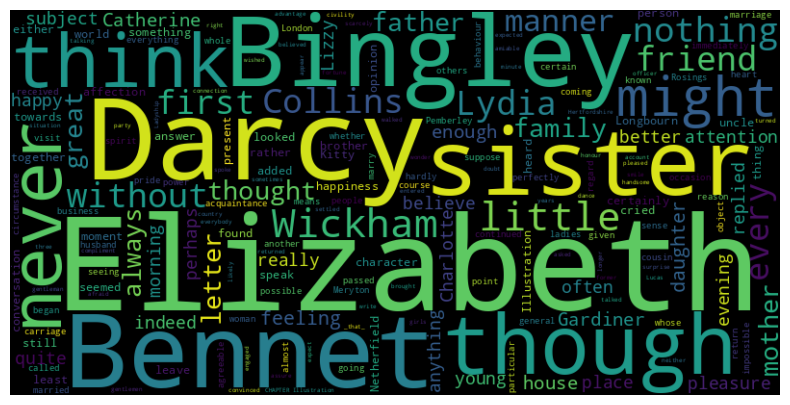

In [12]:
fig4 = wc(width=800, height=400).generate(cleanned_book)
pt.figure(figsize=(10, 5))
pt.imshow(fig4, interpolation='bilinear')
pt.axis('off')
pt.show()

La nube de palabras proporciona una representación visual de las palabras más repetidas en el texto, donde el tamaño de cada palabra está relacionado con su frecuencia.
Las palabras "Bennet", "Darcy", y "Elizabeth" aparecen más grandes debido a su alta frecuencia.
Esta visualización es útil para identificar rápidamente las palabras más importantes del texto sin necesidad de analizar valores numéricos específicos.

In [13]:
sentimientos = sa.polarity_scores(cleanned_book)

if sentimientos['compound'] >= 0.05:
  print('El libro es positivo')
elif sentimientos['compound'] <= -0.05:
  print('El libro es negativo')
else:
  print('El libro es neutral')

print('El puntaje de sentimientos del libro es de: ', sentimientos)

El libro es positivo
El puntaje de sentimientos del libro es de:  {'neg': 0.118, 'neu': 0.618, 'pos': 0.264, 'compound': 1.0}


El análisis de sentimientos del libro revela un predominio del tono positivo, con un puntaje de sentimientos de **{'neg': 0.118, 'neu': 0.618, 'pos': 0.264, 'compound': 1.0}**. Aunque la mayor parte del texto (61.8%) es neutral, el tono positivo (26.4%) supera al negativo (11.8%), lo que inclina el análisis hacia una valoración general optimista. El puntaje **compound = 1.0** indica que las palabras positivas y su contexto predominan significativamente en el contenido analizado.